# Thai Transformers (Bert)
with hugging face
https://huggingface.co/monsoon-nlp/bert-base-thai

https://simpletransformers.ai/docs/qa-minimal-start/

https://github.com/ThilinaRajapakse/simpletransformers

https://huggingface.co/datasets?search=thai

https://mooc.aiat.or.th/courses/thai-transformer-bert-intermediate/lesson/ep-8-thai-automatic-question-answering/


# GPU Instance Checking

In [ ]:
!nvidia-smi

Sat Jun 10 01:25:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()

True

# Install Library

In [ ]:
!pip -q install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.9 MB/s eta 0:00:00


In [ ]:
!pip -q install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.0 MB/s eta 0:00:00


# Thai BERT

ปัจจุบัน BERT มี pretrained 2 ตัว รองรับภาษาไทย ที่อยู่ใน transformers

- [bert-base-multilingual-uncased](https://huggingface.co/bert-base-multilingual-uncased) จาก Google
- [BERT-th](https://github.com/ThAIKeras/bert) จาก ThAIKeras โดย[คุณ Nick Doiron ได้นำมาแปลงใส่ลง transformers](https://huggingface.co/monsoon-nlp/bert-base-thai)
- [Geotrend/bert-base-th-cased](https://huggingface.co/Geotrend/bert-base-th-cased) Model from [Load What You Need: Smaller Versions of Multilingual BERT](https://arxiv.org/abs/2010.05609)

In [ ]:
from transformers import AutoTokenizer, AutoModel
from google.colab import widgets

In [ ]:
pretrained = "monsoon-nlp/bert-base-thai"#@param ["monsoon-nlp/bert-base-thai", "bert-base-multilingual-uncased", "Geotrend/bert-base-th-cased"]

In [ ]:
name = pretrained

In [ ]:
# fill pre-train in AutoTokenizer for cut word depend on our pre-train
tokenizer = AutoTokenizer.from_pretrained(name, use_fast=True)
# model we can use
model = AutoModel.from_pretrained(name)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Preprocessing

In [ ]:
text = ["ทดสอบ ใช้ งาน กับ BERT ภาษาไทย"]

In [ ]:
sent_id = tokenizer.batch_encode_plus(text, padding=True)

input_ids
*   1 = start of sentence
*   2 = stop, seq, end of sentence
*   4 = unknown word of sentence

such as thai word don't know bert. it equals 4.
in thailand we can seperate by deep cut or maximum matching


after cut word
after cut word is good than before cut word because bert will good in sub-word
we should cut word by maximum matching or deep cut before use pre-train

token_type_ids

this model can get 2 sentence
*   0 = the first sentence
*   1 = the last sentence

attention_mask
*   0 = it is special character
*   1 = it is input

In [ ]:
print(sent_id)

{'input_ids': [[1, 6281, 169, 301, 104, 4, 2866, 2]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
# before cut word
text = ["ทดสอบใช้งานกับ BERT ภาษาไทย"]

In [ ]:
sent_id = tokenizer.batch_encode_plus(text, padding=True)

In [ ]:
print(sent_id)

{'input_ids': [[1, 4, 4, 2866, 2]], 'token_type_ids': [[0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1]]}


# Fill Mask

In [ ]:
from transformers import pipeline

In [ ]:
# work by https://huggingface.co/docs/transformers/v4.17.0/en/main_classes/pipelines#transformers.SummarizationPipeline
unmasker = pipeline('fill-mask', model=name, tokenizer=tokenizer)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
unmasker("นายก รัฐมนตรี [MASK] เงิน")

[{'score': 0.00037129074917174876,
  'token': 13770,
  'token_str': 'สเตเดียม',
  'sequence': 'นายก รัฐมนตรี สเตเดียม เงิน'},
 {'score': 0.00035651636426337063,
  'token': 9792,
  'token_str': '็กซัส',
  'sequence': 'นายก รัฐมนตรี ็กซัส เงิน'},
 {'score': 0.00023504041018895805,
  'token': 17498,
  'token_str': 'แตร์',
  'sequence': 'นายก รัฐมนตรี แตร์ เงิน'},
 {'score': 0.0002336810575798154,
  'token': 11109,
  'token_str': 'คอนสแต',
  'sequence': 'นายก รัฐมนตรี คอนสแต เงิน'},
 {'score': 0.0002242147020297125,
  'token': 22674,
  'token_str': 'ามว่า',
  'sequence': 'นายก รัฐมนตรี ามว่า เงิน'}]

In [ ]:
unmasker("เด็ก [MASK] เกม")

[{'score': 0.0003352551138959825,
  'token': 14488,
  'token_str': 'ประหยัด',
  'sequence': 'เด็ก ประหยัด เกม'},
 {'score': 0.0002948905457742512,
  'token': 22512,
  'token_str': 'uph',
  'sequence': 'เด็ก uph เกม'},
 {'score': 0.0002843056572601199,
  'token': 6687,
  'token_str': 'ตาน',
  'sequence': 'เด็ก ตาน เกม'},
 {'score': 0.00027659913757815957,
  'token': 4484,
  'token_str': 'เอเธนส์',
  'sequence': 'เด็ก เอเธนส์ เกม'},
 {'score': 0.0002756738686002791,
  'token': 20691,
  'token_str': 'ตามความ',
  'sequence': 'เด็ก ตามความ เกม'}]

# Text Classification (Wongnai Dataset)

In [ ]:
# https://github.com/ThilinaRajapakse/simpletransformers
# https://simpletransformers.ai/
!pip -q install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:

In [ ]:
!pip -q install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 74.2 MB/s eta 0:00:00


we can find thai dataset by this link: https://huggingface.co/datasets?search=thai

In [ ]:
import numpy as np
import pandas as pd
# data = pd.read_csv("data.csv")
from datasets import load_dataset
wongnai_ds = load_dataset('wongnai_reviews')
# data = load_dataset('wongnai_reviews')

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
wongnai_ds

DatasetDict({
    train: Dataset({
        features: ['review_body', 'star_rating'],
        num_rows: 40000
    })
    test: Dataset({
        features: ['review_body', 'star_rating'],
        num_rows: 6203
    })
})

In [ ]:
num_labels = len(np.unique(np.array(wongnai_ds["train"]["star_rating"])))

In [ ]:
# find unique value
num_labels

5

in bert can use only 2 column:

text is feature

labels is predict category

In [ ]:
wongnai = pd.DataFrame(wongnai_ds['train'])

In [ ]:
wongnai_train = wongnai.sample(frac=0.2) # very small dataset for speed
wongnai_eval = wongnai.sample(frac=0.05) # very smaill dataset for speed

In [ ]:
from pythainlp.tokenize import word_tokenize
# cut word and space word same english languague
wongnai_train["text"] = wongnai_train["review_body"].apply(lambda x: ' '.join(word_tokenize(x)))
wongnai_train["labels"] = wongnai_train["star_rating"]
wongnai_train.labels = pd.Categorical(wongnai_train.labels)

In [ ]:
wongnai_train

,review_body,star_rating,text,labels
29877,มาครั้งแรกก้แประทับใจกับบรรยากาศยามเย็น ลมพัดเ...,4,มา ครั้งแรก ก้ แประ ทับ ใจ กับ บรรยากาศ ยาม เย...,4
27661,"Parking : มีลานจอดรถหลังร้าน, ข้างทางในซ.\nบรร...",3,"Parking : มี ลานจอดรถ หลัง ร้าน , ข้าง ท...",3
38830,ร้านอาหารตามสั่งมุสลิมที่ยังคงมีลูกค้าเนืองแน่...,2,ร้านอาหาร ตาม สั่ง มุสลิม ที่ ยังคง มี ลูกค้า ...,2
28974,ชอบร้านนี้เพราะข้าวหน้าไก่ทอด อร่อยถูกปากมาก ไ...,2,ชอบ ร้าน นี้ เพราะ ข้าว หน้า ไก่ทอด อร่อย ถู...,2
11928,หน้าทะเลก้อต้องแพงนิดนึงตามสถานที่ อิกทั้งมาทะ...,3,หน้า ทะเล ก้อ ต้อง แพง นิดนึง ตาม สถานที่ อิ...,3
...,...,...,...,...
17801,คือร้านนี้มีคนถิ่นแนะนำมาว่าของเค้าอร่อยเด็ดค่...,3,คือ ร้าน นี้ มี คน ถิ่น แนะ นำมา ว่า ของ เค้า ...,3
8517,ร้านก๋วยเตี๋ยวเป่าปาก สาขาวังน้ำเขียว อยู่ก่อน...,3,ร้าน ก๋วยเตี๋ยว เป่าปาก สาขา วัง น้ำ เขียว ...,3
13843,อยากทานหมูหัน มีคนแนะนำร้านนี้คะ ร้านนี้หมูหัน...,2,อยาก ทาน หมูหัน มี คนแนะนำ ร้าน นี้ คะ ร้า...,2
24194,ก็ตามแบบฉบับของอาฟเตอร์ยูทุกสาขาอยู่แล้ว\nปกติ...,3,ก็ ตามแบบฉบับ ของ อาฟเตอร์ ยู ทุก สาขา อยู่แล้...,3


In [ ]:
wongnai_eval["text"] = wongnai_eval["review_body"].apply(lambda x: ' '.join(word_tokenize(x)))
wongnai_eval["labels"] = wongnai_eval["star_rating"]
wongnai_eval.labels = pd.Categorical(wongnai_eval.labels)

<Axes: >

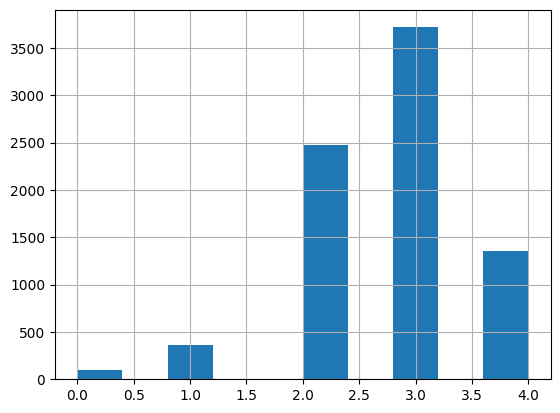

In [ ]:
# rating level of dataset
wongnai_train["labels"].hist()

use only 500 row for solve imbalance. we can not use smote because text can not smote

In [ ]:
wongnai_train = pd.concat([
  wongnai_train[wongnai_train["labels"]==0].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==1].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==2].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==3].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==4].sample(n=500,replace=True),
  ],axis=0)


<Axes: >

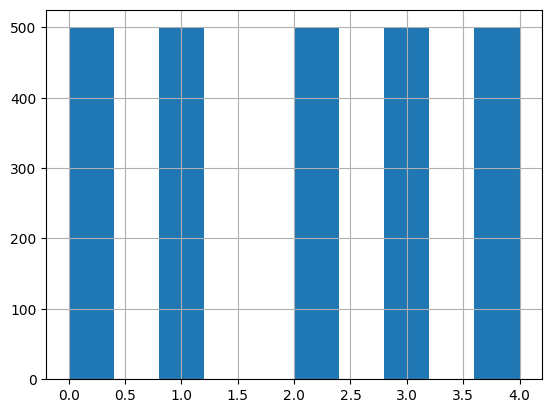

In [ ]:
wongnai_train["labels"].hist()

In [ ]:
# model
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import sklearn

# model_args = ClassificationArgs()
# model_args.custom_parameter_groups = [
#     {
#         "params": ["classifier.weight", "bert.encoder.layer.10.output.dense.weight"],
#         "lr": 1e-2,
#     }
# ]
# agrument for train
model_args = {
    "reprocess_input_data": True,
    'train_batch_size':32,
    "use_early_stopping": True,
    "early_stopping_delta": 0.01,
    "early_stopping_metric": "mcc",
    "early_stopping_metric_minimize": False,
    "early_stopping_patience": 5,
    "evaluate_during_training_steps": 500,
    "fp16": False,
    "overwrite_output_dir":True,
    'use_cached_eval_features' : False,
    'max_seq_length': 256,
    'no_cache': True,
    # epoch
    "num_train_epochs":3,
    'custom_parameter_groups':[{
        "params": ["classifier.weight", "bert.encoder.layer.10.output.dense.weight"],
        "lr": 1e-2,
        # "lr": 1e-3,
        # "lr": 1e-4,
    }]
}

model = ClassificationModel(
    # bert, robota etc,
     "bert",
     # weight
     name,
     # cuda
     use_cuda=torch.cuda.is_available(),
     args=model_args,
    #  amount of labels
     num_labels=num_labels,
)
model.train_model(wongnai_train, show_running_loss = True,eval_df=wongnai_eval, acc=sklearn.metrics.accuracy_score)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not

  0%|          | 0/2500 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
# mcc is confusion matrix calculation
result, model_outputs, wrong_predictions = model.eval_model(wongnai_eval)

In [ ]:
result

In [ ]:
# example of output
model_outputs

In [ ]:
# amount of wrong prediction
len(wrong_predictions)

In [ ]:
model.predict(['ห่วย แดก กิน ไม่ ได้ เลย ขอ บอก อาหาร เน่า มาก กลิ่น เหม็น มี แมลง สาบ มารยาท ทราม สุด ๆ'])

In [ ]:
model.predict(['ร้าน นี้ อาหาร เยี่ยม มาก สุดยอด ประทับ ใจ ที่จอดรถ ใหญ่ ตั้งใน ทำงาน มาก เลย'])

In [ ]:
model.predict(list(wongnai_train['text'])[:10])

In [ ]:
list(wongnai_train["labels"])[:10]

# Text Classification with Custom Dataset (True Voice Intent)

## Preprocessing

In [ ]:
!git clone https://github.com/kobkrit/truevoice-intent

Cloning into 'truevoice-intent'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 6), reused 6 (delta 6), pack-reused 16
Unpacking objects: 100% (25/25), 1.20 MiB | 4.91 MiB/s, done.


In [ ]:
%cd /content

/content


In [ ]:
!unzip truevoice-intent/mari-intent.zip

Archive:  truevoice-intent/mari-intent.zip
  inflating: mari_test.csv           
  inflating: mari_train.csv          


In [ ]:
!ls

mari_test.csv  mari_train.csv  sample_data  truevoice-intent


In [ ]:
!nvidia-smi

Fri Jun  9 23:01:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
train_valid_tv_df = pd.read_csv('mari_train.csv')
test_tv_df = pd.read_csv('mari_test.csv')

In [ ]:
train_valid_tv_df.describe()

,texts,texts_deepcut,action,object,destination
count,12939,12939,12939,12939,12939
unique,11398,11363,8,26,7
top,สอบถามยอดค้างชำระค่ะ,สอบถาม ยอดค้าง ชำระ ค่ะ,enquire,service,billing and payment
freq,10,10,8133,2090,5007


In [ ]:
test_tv_df.describe()

,texts,texts_deepcut,action,object,destination
count,3236,3236,3236,3236,3236
unique,2003,2003,8,24,7
top,บริการอื่นๆ,บริการ อื่น ๆ,enquire,internet,billing and payment
freq,97,97,2351,524,977


<Axes: >

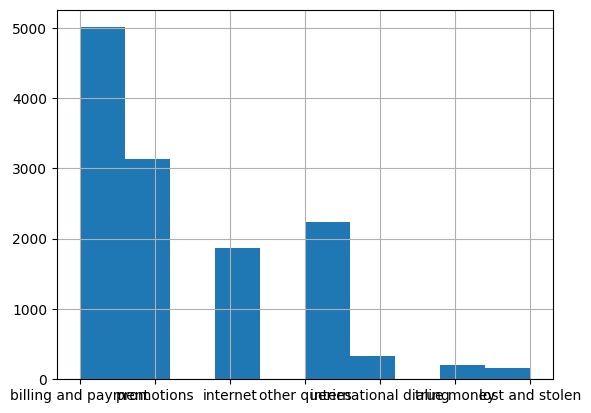

In [ ]:
train_valid_tv_df["destination"].hist()

In [ ]:
# fix Imbalance dataset here

## Dataset Construction

In [ ]:
# Label encoder
from sklearn import preprocessing
tv_le = preprocessing.LabelEncoder()
tv_le.fit(list(test_tv_df['destination']))

LabelEncoder()

In [ ]:
train_tv_df, val_tv_df = train_test_split(train_valid_tv_df, test_size=0.15, random_state=23)
train_tv_df.head()

,texts,texts_deepcut,action,object,destination
8106,ผมจะยกเลิกข้อความอ่ะครับ,ผม จะ ยกเลิก ข้อความ อ่ะครับ,cancel,service,other queries
9586,พี่คะเมื่อวานสมัครเน็ตหน่ะค่ะ,พี่ คะ เมื่อ วาน สมัคร เน็ต หน่ะ ค่ะ,enquire,internet,internet
8606,พอเวลาติดต่อน้อง คุณผู้หญิงคนนั้นให้กดเบอร์ คื...,พอ เวลา ติดต่อ น้อง คุณ ผู้ หญิง คน นั้น ให้ ก...,enquire,internet,internet
5083,จะยกเลิกบริการครับ ไม่ได้ใช้งานเลย แต่มีใบเสร็...,จะ ยกเลิก บริการ ครับ ไม่ ได้ ใช้ งาน เลย แต่ ...,enquire,bill,billing and payment
11454,สอบถามเรื่องจานค่ะ ปรับคุณภาพแล้ว ปรับไม่ได้ค่ะ,สอบถาม เรื่อง จาน ค่ะ ปรับ คุณภาพ แล้ว ปรับ ไม...,enquire,nontruemove,other queries


In [ ]:
# amount of destination labels
import numpy as np
length_label = len(np.unique(np.array(train_tv_df["destination"])))
length_label

7

In [ ]:
train_tv_df['text'] = train_tv_df["texts_deepcut"]
train_tv_df['labels'] = tv_le.transform(train_tv_df["destination"])
val_tv_df['text'] = val_tv_df['texts_deepcut']
val_tv_df['labels'] = tv_le.transform(val_tv_df["destination"])
test_tv_df['text'] = test_tv_df["texts_deepcut"]
test_tv_df['labels'] = tv_le.transform(test_tv_df["destination"])

In [ ]:
train_tv_df

,texts,texts_deepcut,action,object,destination,text,labels
8106,ผมจะยกเลิกข้อความอ่ะครับ,ผม จะ ยกเลิก ข้อความ อ่ะครับ,cancel,service,other queries,ผม จะ ยกเลิก ข้อความ อ่ะครับ,4
9586,พี่คะเมื่อวานสมัครเน็ตหน่ะค่ะ,พี่ คะ เมื่อ วาน สมัคร เน็ต หน่ะ ค่ะ,enquire,internet,internet,พี่ คะ เมื่อ วาน สมัคร เน็ต หน่ะ ค่ะ,2
8606,พอเวลาติดต่อน้อง คุณผู้หญิงคนนั้นให้กดเบอร์ คื...,พอ เวลา ติดต่อ น้อง คุณ ผู้ หญิง คน นั้น ให้ ก...,enquire,internet,internet,พอ เวลา ติดต่อ น้อง คุณ ผู้ หญิง คน นั้น ให้ ก...,2
5083,จะยกเลิกบริการครับ ไม่ได้ใช้งานเลย แต่มีใบเสร็...,จะ ยกเลิก บริการ ครับ ไม่ ได้ ใช้ งาน เลย แต่ ...,enquire,bill,billing and payment,จะ ยกเลิก บริการ ครับ ไม่ ได้ ใช้ งาน เลย แต่ ...,0
11454,สอบถามเรื่องจานค่ะ ปรับคุณภาพแล้ว ปรับไม่ได้ค่ะ,สอบถาม เรื่อง จาน ค่ะ ปรับ คุณภาพ แล้ว ปรับ ไม...,enquire,nontruemove,other queries,สอบถาม เรื่อง จาน ค่ะ ปรับ คุณภาพ แล้ว ปรับ ไม...,4
...,...,...,...,...,...,...,...
9704,พี่จะยกเลิกเสียงเพลงรอสายค่ะ,พี่ จะ ยกเลิก เสียง เพลง รอสายค่ะ,cancel,service,other queries,พี่ จะ ยกเลิก เสียง เพลง รอสายค่ะ,4
11190,สอบถาม internet ที่สมัครใช้งานอย่างไรค่ะ,สอบถาม internet ที่ สมัคร ใช้ งาน อย่าง ไร ค่ะ,enquire,package,promotions,สอบถาม internet ที่ สมัคร ใช้ งาน อย่าง ไร ค่ะ,5
10185,รบกวนเช็คค่าบริการอินเตอร์เน็ต,รบกวนเช็ค ค่า บริการ อินเตอร์เน็ต,enquire,balance,billing and payment,รบกวนเช็ค ค่า บริการ อินเตอร์เน็ต,0
9256,พอดีว่าจะเปลี่ยนโปรค่ะเป๊น นาที ค่ะ,พอดี ว่า จะ เปลี่ยน โปร ค่ะ เป๊น นาที ค่ะ,change,package,promotions,พอดี ว่า จะ เปลี่ยน โปร ค่ะ เป๊น นาที ค่ะ,5


simple transformer can use name only texts(feature) and labels(label)

<Axes: >

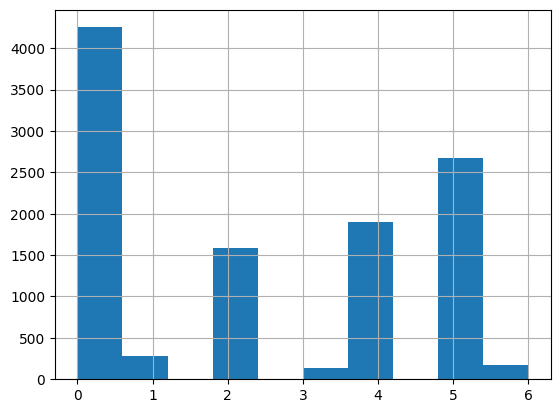

In [ ]:
train_tv_df["labels"].hist()

In [ ]:
length_label = len(np.unique(np.array(train_tv_df["labels"])))
length_label

7

In [ ]:
# model
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import sklearn

model_args = {
    "reprocess_input_data": True,
    'train_batch_size':32,
    "use_early_stopping": True,
    "early_stopping_delta": 0.01,
    "early_stopping_metric": "mcc",
    "early_stopping_metric_minimize": False,
    "early_stopping_patience": 5,
    "evaluate_during_training_steps": 500,
    "fp16": False,
    "overwrite_output_dir":True,
    # 'use_cached_eval_features' : False,
    # 'max_seq_length': 256,
    # 'no_cache': True,
    "num_train_epochs":3,
    # 'custom_parameter_groups':[{
    #     "params": ["classifier.weight", "bert.encoder.layer.10.output.dense.weight"],
    #     "lr": 1e-2,
    # }]
}

model = ClassificationModel(
     "bert",
     name,
     use_cuda=torch.cuda.is_available(),
     args=model_args,
     num_labels=length_label,
)
model.train_model(train_tv_df, show_running_loss = True, eval_df=val_tv_df, acc=sklearn.metrics.accuracy_score)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not

  0%|          | 0/10998 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
model.predict(list(val_tv_df['text'])[:10])

In [ ]:
list(val_tv_df['labels'])[:10]

# Thai Question Answering (Thai QA)

## Data Preprocessing

In [ ]:
from datasets import load_dataset
thaiqa_ds = load_dataset("thaiqa_squad")

Generating train split:   0%|          | 0/4000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/74 [00:00<?, ? examples/s]

Dataset thaiqa_squad downloaded and prepared to /root/.cache/huggingface/datasets/thaiqa_squad/thaiqa_squad/1.0.0/fce14864b511d48464540780f328f4b415746b63f2fd934ad0b06c3eead7787b. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
thaiqa_ds

DatasetDict({
    train: Dataset({
        features: ['question_id', 'article_id', 'context', 'question', 'answers'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['question_id', 'article_id', 'context', 'question', 'answers'],
        num_rows: 74
    })
})

In [ ]:
import pandas as pd
qa_train = pd.DataFrame(thaiqa_ds["train"])

In [ ]:
qa_train

,question_id,article_id,context,question,answers
0,1,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,"{'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi..."
1,2035,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",เพลง Benji's Theme ใช้ประกอบภาพยนตร์เรื่อง Ben...,"{'answer': ['ชาร์ลี ริช'], 'answer_begin_posit..."
2,2,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['เมชตา'], 'answer_begin_position':..."
3,3,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['ลมสุริยะ'], 'answer_begin_positio..."
4,4,547560,"<doc id=""547560"" url=""https://th.wikipedia.org...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,"{'answer': ['ปี 1933'], 'answer_begin_position..."
...,...,...,...,...,...
3995,3996,5114,"<doc id=""5114"" url=""https://th.wikipedia.org/w...",จังหวัดใดมีพื้นที่มากที่สุดในประเทศไทย,"{'answer': ['นครราชสีมา'], 'answer_begin_posit..."
3996,3997,5114,"<doc id=""5114"" url=""https://th.wikipedia.org/w...",ดอกไม้ประจำจังหวัดนครราชสีมาในประเทศไทยคือดอกอะไร,"{'answer': ['ดอกสาธร'], 'answer_begin_position..."
3997,3998,20722,"<doc id=""20722"" url=""https://th.wikipedia.org/...",เมืองหลวงของประเทศโมร็อกโกมีชื่อว่าอะไร,"{'answer': ['ราบัต'], 'answer_begin_position':..."
3998,3999,355975,"<doc id=""355975"" url=""https://th.wikipedia.org...",กลุ่มบริษัท คิง เพาเวอร์ เป็นบริษัทด้านธุรกิจค...,"{'answer': ['2532'], 'answer_begin_position': ..."


In [ ]:
qa_train["context"]

0       <doc id="115035" url="https://th.wikipedia.org...
1       <doc id="115035" url="https://th.wikipedia.org...
2       <doc id="376583" url="https://th.wikipedia.org...
3       <doc id="376583" url="https://th.wikipedia.org...
4       <doc id="547560" url="https://th.wikipedia.org...
                              ...                        
3995    <doc id="5114" url="https://th.wikipedia.org/w...
3996    <doc id="5114" url="https://th.wikipedia.org/w...
3997    <doc id="20722" url="https://th.wikipedia.org/...
3998    <doc id="355975" url="https://th.wikipedia.org...
3999    <doc id="355975" url="https://th.wikipedia.org...
Name: context, Length: 4000, dtype: object

In [ ]:
qa_train["context"][0]

'<doc id="115035" url="https://th.wikipedia.org/wiki?curid=115035" title="เบนจี้">เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู้ ที่ปรากฏอยู่ในภาพยนตร์หลายเรื่องที่เขียนบท และกำกับโดย โจ แคมป์ ในช่วงทศวรรษ 1970 ถึง 1980 ภาพยนตร์เรื่องแรกในชุด ใช้ชื่อเรื่องว่า เบนจี้ เช่นเดียวกับตัวละคร ถ่ายทำที่เมืองดัลลัส รัฐเทกซัส ฉายครั้งแรกในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji\'s Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of Benji (ภาพยนตร์) - พ.ศ. 2521, Benji\'s Very Own Christmas Story (ภาพยนตร์โทรทัศน์) - พ.ศ. 2523, Oh Heavenly Dog (ภาพยนตร์) - พ.ศ. 2523, Benji at Work (ภาพยนตร์โทรทัศน์) - พ.ศ. 2524, Benji Takes a Dive at Marineland (ภาพยนตร์โทรทัศน์) - พ.ศ. 2526, Benji, Zax & t

In [ ]:
from lxml import etree
import xml.etree.ElementTree as ET
parser = etree.XMLParser(recover=True)
tree = ET.fromstring(qa_train["context"][0], parser=parser)
print(tree.tag)
print(tree.attrib)
print(tree.text)

doc
{'id': '115035', 'url': 'https://th.wikipedia.org/wiki?curid=115035', 'title': 'เบนจี้'}
เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู้ ที่ปรากฏอยู่ในภาพยนตร์หลายเรื่องที่เขียนบท และกำกับโดย โจ แคมป์ ในช่วงทศวรรษ 1970 ถึง 1980 ภาพยนตร์เรื่องแรกในชุด ใช้ชื่อเรื่องว่า เบนจี้ เช่นเดียวกับตัวละคร ถ่ายทำที่เมืองดัลลัส รัฐเทกซัส ฉายครั้งแรกในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji's Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of Benji (ภาพยนตร์) - พ.ศ. 2521, Benji's Very Own Christmas Story (ภาพยนตร์โทรทัศน์) - พ.ศ. 2523, Oh Heavenly Dog (ภาพยนตร์) - พ.ศ. 2523, Benji at Work (ภาพยนตร์โทรทัศน์) - พ.ศ. 2524, Benji Takes a Dive at Marineland (ภาพยนตร์โทรทัศน์) - พ.ศ. 2526, Benji

In [ ]:
def extract_text(body):
  tree = ET.fromstring(body, parser=parser)
  return tree.text

In [ ]:
extract_text(qa_train["context"][0])

"เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู้ ที่ปรากฏอยู่ในภาพยนตร์หลายเรื่องที่เขียนบท และกำกับโดย โจ แคมป์ ในช่วงทศวรรษ 1970 ถึง 1980 ภาพยนตร์เรื่องแรกในชุด ใช้ชื่อเรื่องว่า เบนจี้ เช่นเดียวกับตัวละคร ถ่ายทำที่เมืองดัลลัส รัฐเทกซัส ฉายครั้งแรกในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji's Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of Benji (ภาพยนตร์) - พ.ศ. 2521, Benji's Very Own Christmas Story (ภาพยนตร์โทรทัศน์) - พ.ศ. 2523, Oh Heavenly Dog (ภาพยนตร์) - พ.ศ. 2523, Benji at Work (ภาพยนตร์โทรทัศน์) - พ.ศ. 2524, Benji Takes a Dive at Marineland (ภาพยนตร์โทรทัศน์) - พ.ศ. 2526, Benji, Zax  the Alien Prince (ภาพยนตร์ซีรีส์) - พ.ศ. 2530, Benji the Hunted (ภาพยนตร์) - พ.ศ. 254

In [ ]:
qa_train["context_text"] = qa_train["context"].apply(extract_text)

In [ ]:
qa_train.head()

,question_id,article_id,context,question,answers,context_text
0,1,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,"{'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...
1,2035,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",เพลง Benji's Theme ใช้ประกอบภาพยนตร์เรื่อง Ben...,"{'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...
2,2,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['เมชตา'], 'answer_begin_position':...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...
3,3,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['ลมสุริยะ'], 'answer_begin_positio...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...
4,4,547560,"<doc id=""547560"" url=""https://th.wikipedia.org...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,"{'answer': ['ปี 1933'], 'answer_begin_position...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...


In [ ]:
from pythainlp.tokenize import word_tokenize
qa_train["context_text_wordseqqed"] = qa_train["context_text"].apply(lambda x: " ".join(word_tokenize(x)))

In [ ]:
qa_train["question_wordseqqed"] = qa_train["question"].apply(lambda x: ' '.join(word_tokenize(x)))

In [ ]:
qa_train.head()

,question_id,article_id,context,question,answers,context_text,context_text_wordseqqed,question_wordseqqed
0,1,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,"{'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,เบน จี้ เบน จี้ () เป็น ชื่อ ตัวละคร หมา...,สุนัข ตัว แรก รับบท เป็น เบน จี้ ใน ภาพยนตร์ เ...
1,2035,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",เพลง Benji's Theme ใช้ประกอบภาพยนตร์เรื่อง Ben...,"{'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,เบน จี้ เบน จี้ () เป็น ชื่อ ตัวละคร หมา...,เพลง Benji ' s Theme ใช้ ประกอบ ภาพยนตร์...
2,2,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['เมชตา'], 'answer_begin_position':...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลู นา 1 ลู นา 1 ( อี - 1 ซีรีส์ ) ...,ลู นา 1 เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...
3,3,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['ลมสุริยะ'], 'answer_begin_positio...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลู นา 1 ลู นา 1 ( อี - 1 ซีรีส์ ) ...,ลู นา 1 เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...
4,4,547560,"<doc id=""547560"" url=""https://th.wikipedia.org...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,"{'answer': ['ปี 1933'], 'answer_begin_position...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...,กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ กระ...,กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ ของ น...


In [ ]:
qa_train["answers_wordseqqed"] = qa_train["answers"].apply(lambda x: " ".join(word_tokenize(x["answer"][0])))

In [ ]:
qa_train.head()

,question_id,article_id,context,question,answers,context_text,context_text_wordseqqed,question_wordseqqed,answers_wordseqqed
0,1,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,"{'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,เบน จี้ เบน จี้ () เป็น ชื่อ ตัวละคร หมา...,สุนัข ตัว แรก รับบท เป็น เบน จี้ ใน ภาพยนตร์ เ...,ฮิ กกิ้นส์
1,2035,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",เพลง Benji's Theme ใช้ประกอบภาพยนตร์เรื่อง Ben...,"{'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,เบน จี้ เบน จี้ () เป็น ชื่อ ตัวละคร หมา...,เพลง Benji ' s Theme ใช้ ประกอบ ภาพยนตร์...,ชาร์ลี ริ ช
2,2,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['เมชตา'], 'answer_begin_position':...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลู นา 1 ลู นา 1 ( อี - 1 ซีรีส์ ) ...,ลู นา 1 เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...,เม ช ตา
3,3,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['ลมสุริยะ'], 'answer_begin_positio...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลู นา 1 ลู นา 1 ( อี - 1 ซีรีส์ ) ...,ลู นา 1 เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...,ลม สุริยะ
4,4,547560,"<doc id=""547560"" url=""https://th.wikipedia.org...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,"{'answer': ['ปี 1933'], 'answer_begin_position...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...,กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ กระ...,กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ ของ น...,ปี 1933


In [ ]:
answer_starts = []
for idx, row in qa_train.iterrows():
  try:
    answer_start = row["context_text_wordseqqed"].index(row["answers_wordseqqed"])
  except:
    answer_start = -1
  answer_starts.append(answer_start)


In [ ]:
qa_train["answer_starts"] = answer_starts

In [ ]:
qa_train.tail()

,question_id,article_id,context,question,answers,context_text,context_text_wordseqqed,question_wordseqqed,answers_wordseqqed,answer_starts
3995,3996,5114,"<doc id=""5114"" url=""https://th.wikipedia.org/w...",จังหวัดใดมีพื้นที่มากที่สุดในประเทศไทย,"{'answer': ['นครราชสีมา'], 'answer_begin_posit...",จังหวัดนครราชสีมา นครราชสีมา หรือรู้จักในชื่อ ...,จังหวัด นครราชสีมา นครราชสีมา หรือ รู้จัก ...,จังหวัด ใด มี พื้นที่ มาก ที่สุด ในประเทศ ไทย,นครราชสีมา,8
3996,3997,5114,"<doc id=""5114"" url=""https://th.wikipedia.org/w...",ดอกไม้ประจำจังหวัดนครราชสีมาในประเทศไทยคือดอกอะไร,"{'answer': ['ดอกสาธร'], 'answer_begin_position...",จังหวัดนครราชสีมา นครราชสีมา หรือรู้จักในชื่อ ...,จังหวัด นครราชสีมา นครราชสีมา หรือ รู้จัก ...,ดอกไม้ ประจำจังหวัด นครราชสีมา ในประเทศ ไทย คื...,ดอก สาธร,926
3997,3998,20722,"<doc id=""20722"" url=""https://th.wikipedia.org/...",เมืองหลวงของประเทศโมร็อกโกมีชื่อว่าอะไร,"{'answer': ['ราบัต'], 'answer_begin_position':...",ประเทศโมร็อกโก โมร็อกโก (; ชื่อทางการคือ ราชอา...,ประเทศ โมร็อกโก โมร็อกโก (; ชื่อ ทางการ ...,เมืองหลวง ของ ประเทศ โมร็อกโก มี ชื่อว่า อะไร,รา บัต,470
3998,3999,355975,"<doc id=""355975"" url=""https://th.wikipedia.org...",กลุ่มบริษัท คิง เพาเวอร์ เป็นบริษัทด้านธุรกิจค...,"{'answer': ['2532'], 'answer_begin_position': ...",คิง เพาเวอร์ กลุ่มบริษัท คิง เพาเวอร์ (อังกฤษ:...,คิง เพาเวอร์ กลุ่ม บริษัท คิง เพาเวอร์...,กลุ่ม บริษัท คิง เพาเวอร์ เป็น บริษัท ด้...,2532,169
3999,4000,355975,"<doc id=""355975"" url=""https://th.wikipedia.org...",ใครคือผู้ก่อตั้งบริษัทด้านธุรกิจค้าปลีกสินค้าป...,"{'answer': ['วิชัย ศรีวัฒนประภา'], 'answer_beg...",คิง เพาเวอร์ กลุ่มบริษัท คิง เพาเวอร์ (อังกฤษ:...,คิง เพาเวอร์ กลุ่ม บริษัท คิง เพาเวอร์...,ใคร คือ ผู้ก่อตั้ง บริษัท ด้าน ธุรกิจ ค้าปลีก ...,วิชัย ศรี วัฒน ประภา,180


Standford Question Answering Dataset (SQuAD) format from
https://simpletransformers.ai/docs/qa-data-formats/



In [ ]:
# train_data = [
#     {
#         "context": "Mistborn is a series of epic fantasy novels written by American author Brandon Sanderson.",
#         "qas": [
#             {
#                 "id": "00001",
#                 "is_impossible": False,
#                 "question": "Who is the author of the Mistborn series?",
#                 "answers": [
#                     {
#                         "text": "Brandon Sanderson",
#                         "answer_start": 71,
#                     }
#                 ],
#             }
#         ],
#     },
#     {
#         "context": "The first series, published between 2006 and 2008, consists of The Final Empire,"
#                    "The Well of Ascension, and The Hero of Ages.",
#         "qas": [
#             {
#                 "id": "00002",
#                 "is_impossible": False,
#                 "question": "When was the series published?",
#                 "answers": [
#                     {
#                         "text": "between 2006 and 2008",
#                         "answer_start": 28,
#                     }
#                 ],
#             },
#             {
#                 "id": "00003",
#                 "is_impossible": False,
#                 "question": "What are the three books in the series?",
#                 "answers": [
#                     {
#                         "text": "The Final Empire, The Well of Ascension, and The Hero of Ages",
#                         "answer_start": 63,
#                     }
#                 ],
#             },
#             {
#                 "id": "00004",
#                 "is_impossible": True,
#                 "question": "Who is the main character in the series?",
#                 "answers": [],
#             },
#         ],
#     },
# ]


In [ ]:
qa_train.head()

,question_id,article_id,context,question,answers,context_text,context_text_wordseqqed,question_wordseqqed,answers_wordseqqed,answer_starts
0,1,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",สุนัขตัวแรกรับบทเป็นเบนจี้ในภาพยนตร์เรื่อง Ben...,"{'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,เบน จี้ เบน จี้ () เป็น ชื่อ ตัวละคร หมา...,สุนัข ตัว แรก รับบท เป็น เบน จี้ ใน ภาพยนตร์ เ...,ฮิ กกิ้นส์,580
1,2035,115035,"<doc id=""115035"" url=""https://th.wikipedia.org...",เพลง Benji's Theme ใช้ประกอบภาพยนตร์เรื่อง Ben...,"{'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...",เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...,เบน จี้ เบน จี้ () เป็น ชื่อ ตัวละคร หมา...,เพลง Benji ' s Theme ใช้ ประกอบ ภาพยนตร์...,ชาร์ลี ริ ช,518
2,2,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['เมชตา'], 'answer_begin_position':...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลู นา 1 ลู นา 1 ( อี - 1 ซีรีส์ ) ...,ลู นา 1 เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...,เม ช ตา,82
3,3,376583,"<doc id=""376583"" url=""https://th.wikipedia.org...",ลูนา 1 เป็นยานอวกาศลำแรกในโครงการลูนาของโซเวีย...,"{'answer': ['ลมสุริยะ'], 'answer_begin_positio...",ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...,ลู นา 1 ลู นา 1 ( อี - 1 ซีรีส์ ) ...,ลู นา 1 เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...,ลม สุริยะ,703
4,4,547560,"<doc id=""547560"" url=""https://th.wikipedia.org...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อของนาซีเยอ...,"{'answer': ['ปี 1933'], 'answer_begin_position...",กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...,กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ กระ...,กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ ของ น...,ปี 1933,230


In [ ]:
train_data = []
for idx, row in qa_train.iterrows():
  doc = {}
  doc["context"] = row["context_text_wordseqqed"]
  doc["qas"] = [{"id":idx,
                 "is_impossible":row["answer_starts"]<0,
                 "question":row["question_wordseqqed"],
                 "answers":[{
                 "text":row["answers_wordseqqed"],
                 "answer_start":row["answer_starts"]
                 }]
                 }]

                            # "answers":[{"text":row["answers_wordseqqed"],
# }]
train_data.append(doc)

In [ ]:
row

question_id                                                             4000
article_id                                                            355975
context                    <doc id="355975" url="https://th.wikipedia.org...
question                   ใครคือผู้ก่อตั้งบริษัทด้านธุรกิจค้าปลีกสินค้าป...
answers                    {'answer': ['วิชัย ศรีวัฒนประภา'], 'answer_beg...
context_text               คิง เพาเวอร์ กลุ่มบริษัท คิง เพาเวอร์ (อังกฤษ:...
context_text_wordseqqed    คิง   เพาเวอร์   กลุ่ม บริษัท   คิง   เพาเวอร์...
question_wordseqqed        ใคร คือ ผู้ก่อตั้ง บริษัท ด้าน ธุรกิจ ค้าปลีก ...
answers_wordseqqed                                    วิชัย   ศรี วัฒน ประภา
answer_starts                                                            180
Name: 3999, dtype: object

In [ ]:
train_data

[{'context': 'คิง   เพาเวอร์   กลุ่ม บริษัท   คิง   เพาเวอร์   ( อังกฤษ :   King   Power   Group )   เป็น บริษัท ด้าน ธุรกิจ ค้าปลีก สินค้า ปลอด อากร ของ ไทย   ก่อตั้ง ใน ปี   พ.ศ.   2532   โดย วิชัย   ศรี วัฒน ประภา   ใช้ ชื่อ เดิม ว่า   บริษัท   ดาวน์ทาวน์   ดี . เอ ฟ. เอส   ( ไทยแลนด์ )   จำกัด   ได้ ร่วมทุน กับ   ททท.   เปิด ดำเนินกิจการ ร้านค้า ปลอด อากร ใน เมือง เป็นราย แรก ในประเทศ ไทย   ณ   อาคาร มหา ทุน พลาซ่า   ถนน เพลิน จิต   ต่อมา ใน ปี   พ.ศ.   2536   -   2549   ได้รับ สัมปทาน จาก การท่าอากาศยานแห่งประเทศไทย   ( ปัจจุบัน คือ   บริษัท   ท่าอากาศยาน ไทย   จำกัด   ( มหาชน ))   เข้า บริหาร ร้านค้า ปลอดภาษี   ที่ ท่าอากาศยาน ดอนเมือง   เชียงใหม่   ภูเก็ต   และ หาดใหญ่   ซึ่ง ได้ เปลี่ยน ชื่อ เป็น   บริษัท   คิง   เพาเวอร์   แท็ก ซ์ ฟรี   จำกัด   และ ใน ปี   พ.ศ.   2549   ได้ เข้ามา ดำเนินการ สินค้า ปลอด อากร   ที่   ท่าอากาศยาน สุวรรณภูมิ   โดย ใน เดือน ธันวาคม   พ.ศ.   2552   บริษัท ได้รับ พระราชทาน ตราตั้ง ห้าง ครุฑ   ตั้งอยู่ ที่ สำนักงานใหญ่   ถนน รางน้ำ   ใน เดือน สิงหาคม 

# Finetuning

In [ ]:
from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs

# Configure the model
# model_args = QuestionAnsweringArgs()
# model_args.train_batch_size = 16
# model_args.evaluate_during_training = True
# model_args.num_train_epochs = 3
model_args = {
    "reprocess_input_data": True,
    'train_batch_size':32,
    "use_early_stopping": True,
    "early_stopping_delta": 0.01,
    "early_stopping_metric": "mcc",
    "early_stopping_metric_minimize": False,
    "early_stopping_patience": 5,
    "evaluate_during_training_steps": 500,
    "fp16": False,
    "overwrite_output_dir":True,
    # 'use_cached_eval_features' : False,
    # 'max_seq_length': 256,
    # 'no_cache': True,
    "num_train_epochs":3,
    # 'custom_parameter_groups':[{
    #     "params": ["classifier.weight", "bert.encoder.layer.10.output.dense.weight"],
    #     "lr": 1e-2,
    # }]
}


model = QuestionAnsweringModel(
     "bert",
     name,
     use_cuda=torch.cuda.is_available(),
     args=model_args,
    #  num_labels=length_label,
)
# model = QuestionAnsweringModel(
#     "bert", name
# )

# Train the model
model.train_model(train_data, eval_data=train_data)

# Evaluate the model
result, texts = model.eval_model(train_data)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForQuestionAnswering: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from th

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1 [00:00<?, ?it/s]

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 586.37it/s]


Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]